<a href="https://colab.research.google.com/github/tiya1012/imagegeneration/blob/main/stablediffusionimage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install diffusers==0.2.4
#!pip install transformers scipy ftfy
!pip install "ipywidgets>=7,<8"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install transformers==4.24.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from huggingface_hub import notebook_login

notebook_login()

In [4]:
import torch
from diffusers import StableDiffusionPipeline

# make sure you're logged in with `huggingface-cli login`
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", revision="fp16", torch_dtype=torch.float16, use_auth_token=True)  
pipe = pipe.to("cuda")

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


0it [00:00, ?it/s]

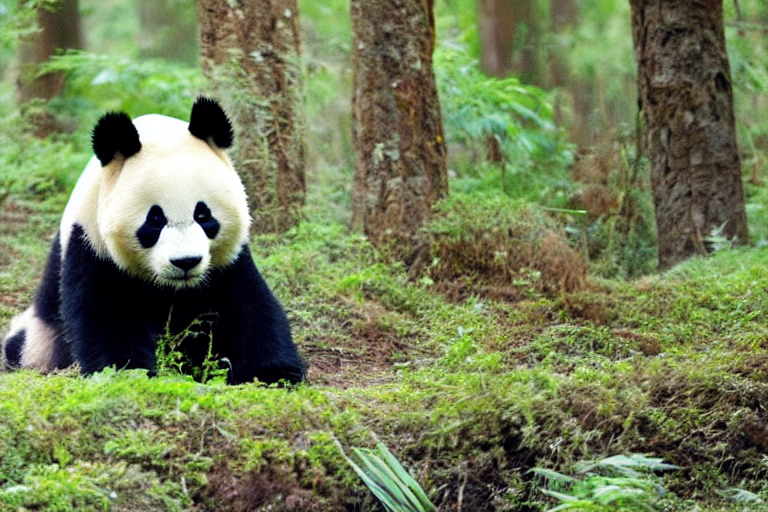

In [6]:
from torch import autocast

prompt = "one panda in the forest"

with autocast("cuda"):
    image = pipe(prompt, height=512, width=768, num_inference_steps=50, guidance_scale=7)["sample"][0]  # image here is in [PIL format](https://pillow.readthedocs.io/en/stable/)

image